In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/FreeSampling/"
print("data path: ", data_path)

level: level3 & tutorial name: free-energy-calculation
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level3/free-energy-calculation/FreeSampling/


In [3]:
sigma = 3.405 # Angstrom
epsilon = 0.238 # Kcal/mol
U0 = 1.5*epsilon # Kcal/mol
delta = 0.5 # Angstrom
x0 = 5.0 # Angstrom
x = np.linspace(-25, 25, 50000)  # Angstrom
U = U0 * (np.arctan((x + x0) / delta) - np.arctan((x - x0) / delta))
F = (U0/delta)/(((x - x0)**2)/delta**2 + 1) - (U0/delta)/(((x + x0)**2)/delta**2 + 1)

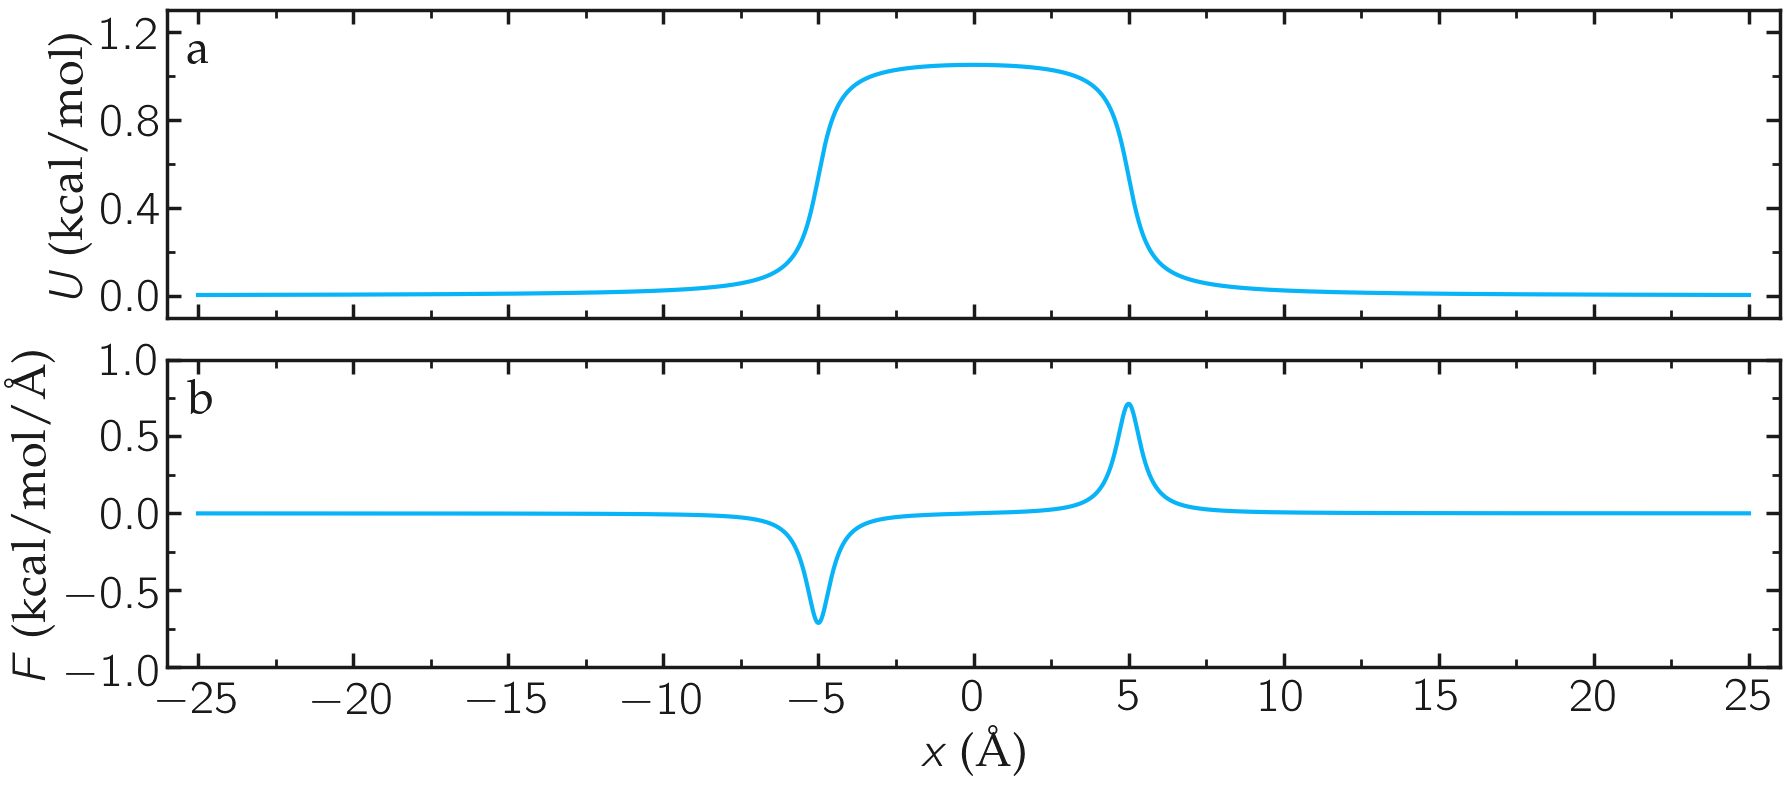

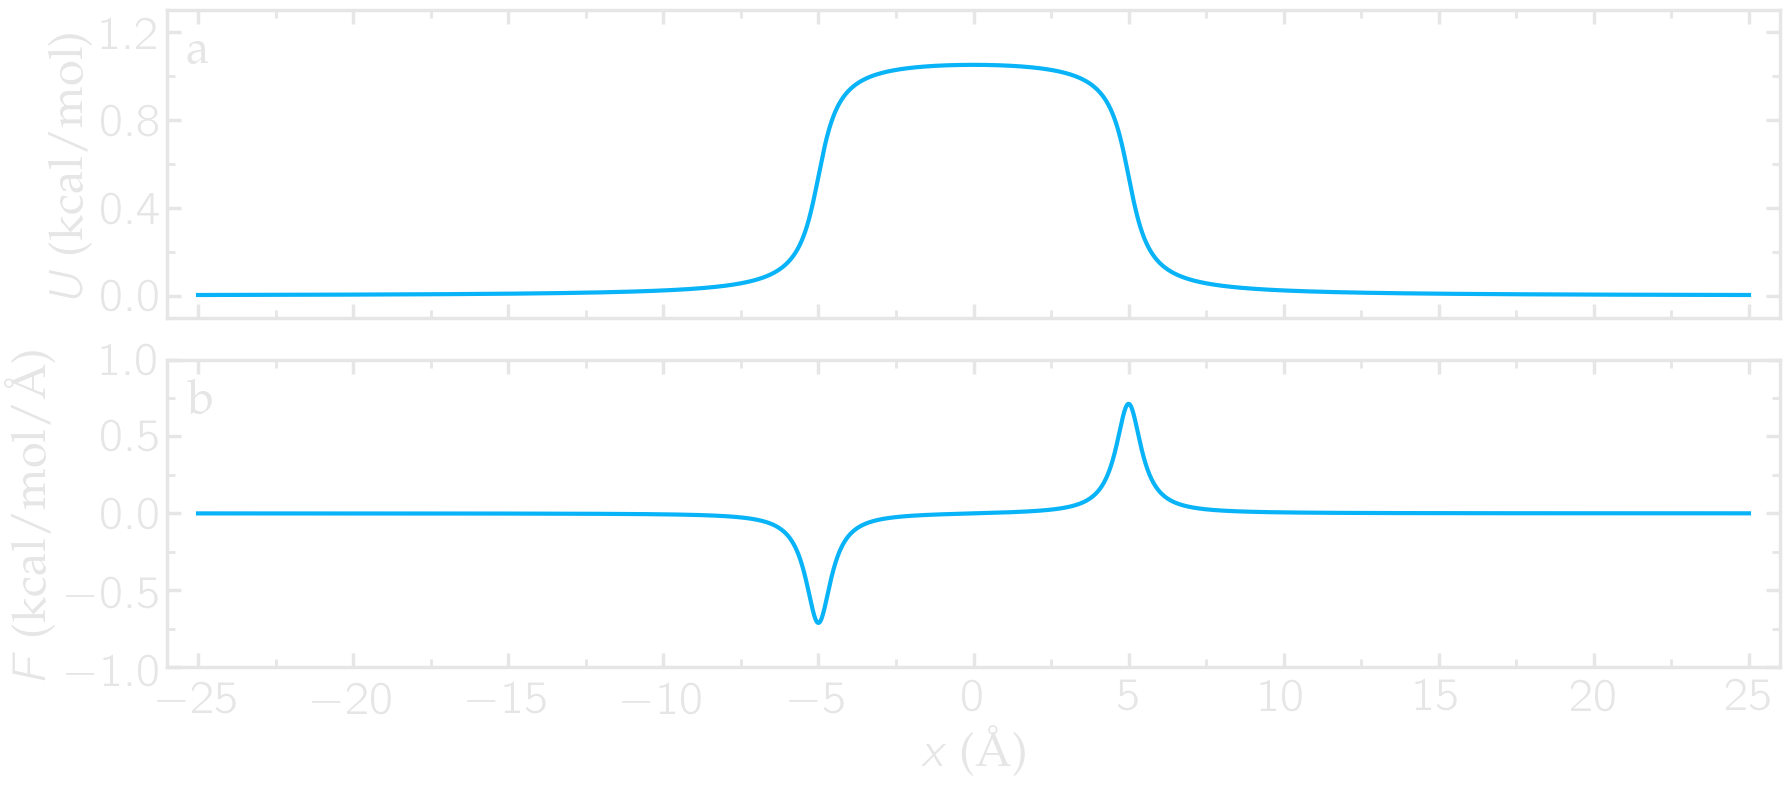

In [6]:
filename = "potential"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,8))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(x, U, color=colors["blue2livecom"], linewidth=3)
    complete_panel(ax[-1], None, r'$U ~ \textrm{(kcal/mol)}$', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), y_ticks=np.arange(0, 1.4, 0.4),
                   x_boundaries=(-26, 26), y_boundaries=(-0.1, 1.3))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(x, F, color=colors["blue2livecom"], linewidth=3)
    complete_panel(ax[-1], r'$x ~ \textrm{(\AA)}$', r'$F ~ \textrm{(kcal/mol/\AA)}$',
                legend=False, axis_color=mygray, locator_y=2, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26),
                   y_ticks=np.arange(-1, 1.1, 0.5))
    add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

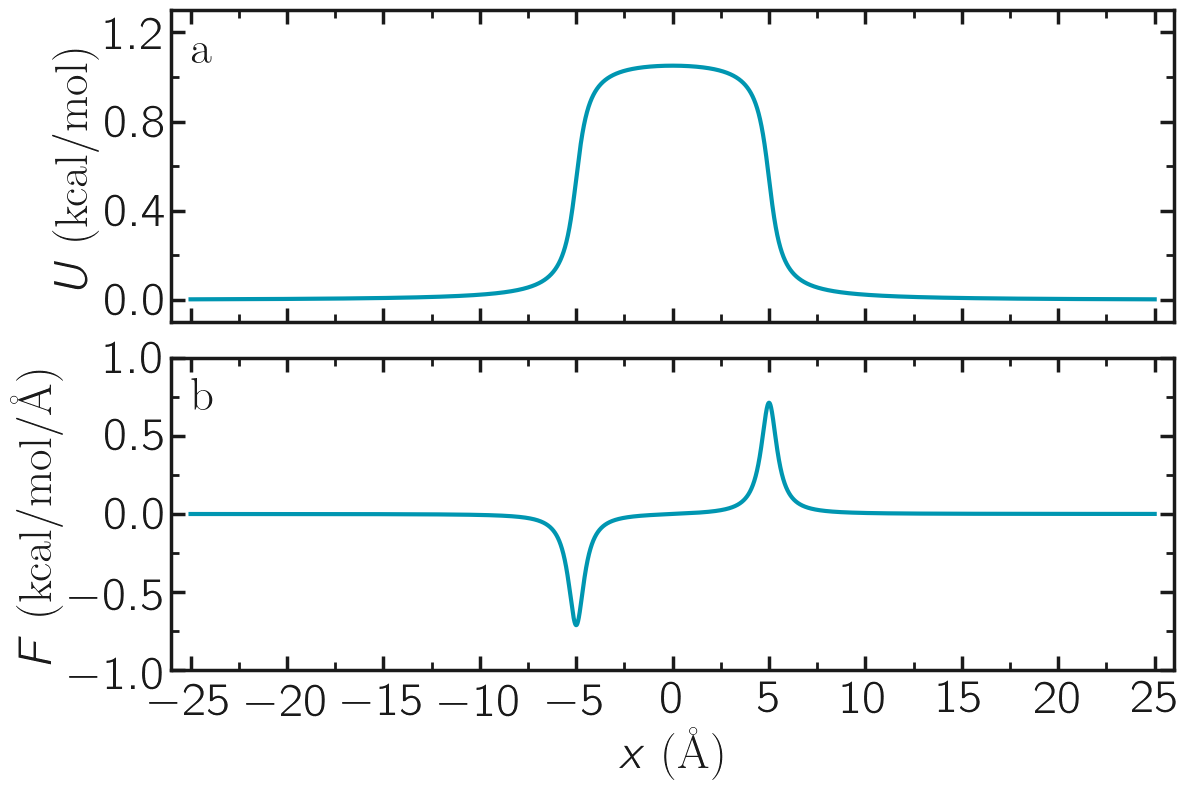

In [5]:
filename = "potential-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,8), serif=False)
ax, n, l_tot, c_tot = [], 0, 2, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(x, U, color=colors["myblue"], linewidth=3)
complete_panel(ax[-1], None, r'$U ~ \textrm{(kcal/mol)}$', legend=False, axis_color=mygray)
set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), y_ticks=np.arange(0, 1.4, 0.4),
                x_boundaries=(-26, 26), y_boundaries=(-0.1, 1.3))
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(x, F, color=colors["myblue"], linewidth=3)
complete_panel(ax[-1], r'$x ~ \textrm{(\AA)}$', r'$F ~ \textrm{(kcal/mol/\AA)}$',
            legend=False, axis_color=mygray, locator_y=2, xpad=8)
set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26),
                y_ticks=np.arange(-1, 1.1, 0.5))
add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)